In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
tweet = pd.read_csv('/content/Elon_musk.csv', encoding='cp1252',error_bad_lines=False)

<ipython-input-192-736c8758528c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweet = pd.read_csv('/content/Elon_musk.csv', encoding='cp1252',error_bad_lines=False)


In [ ]:
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweet.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
tweet.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


EDA on text file

In [ ]:
tweet = [Text.strip() for Text in tweet.Text]   # to remove unwanted space
tweet = [Text for Text in tweet if Text]  # removes empty string
tweet


['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [ ]:
# joining list into one text

text = ' '.join(tweet)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [ ]:
# Removing Punctuation

nopunc_text = text.translate(str.maketrans('','', string.punctuation))
nopunc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenization

from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(nopunc_text)
print(text_tokens)

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', '

In [ ]:
# Remove stopwards

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('I')
my_stop_words.append('an')
my_stop_words.append('’')
my_stop_words.append(open('stop.txt'))

stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(stop_tokens[0:40])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kunalb11', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself']


In [ ]:
#Normalize the data
lower_words = [x.lower() for x in stop_tokens]
print(lower_words[0:25])

['kunalb11', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year']


In [ ]:
#Stemming (bringing word to its root form)
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:25])

['kunalb11', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year']


there are some Overstemming of the strings

In [ ]:
!python -m spacy download en

2023-09-12 11:36:58.108504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

To tackel disadvantage of stemming function (overstemming)

> We are using Lemmas......



In [ ]:
doc = nlp(' '.join(stop_tokens))
print(doc[0:40])

kunalb11 alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year']


#Feacture Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
vectorizer.vocabulary_

{'kunalb11': 2703,
 'alien': 232,
 'idaacarmack': 2440,
 'ray': 3620,
 'trace': 4495,
 'cyberpunk': 962,
 'hdr': 1677,
 'nextlevel': 3156,
 'have': 1671,
 'try': 4529,
 'joerogan': 2623,
 'spotify': 4114,
 'great': 1609,
 'interview': 2551,
 'gtera27': 1628,
 'doge': 1115,
 'underestimate': 4662,
 'teslacn': 4340,
 'congratulations': 857,
 'tesla': 4334,
 'china': 741,
 'amazing': 258,
 'execution': 1326,
 'last': 2723,
 'year': 4932,
 'now': 3196,
 'next': 3155,
 'even': 1298,
 'happy': 1658,
 'new': 3152,
 'ox': 3313,
 'httpstco9wfkmyu2oj': 1867,
 'frodo': 1494,
 'underdoge': 4661,
 'all': 235,
 'thought': 4420,
 'would': 4907,
 'fail': 1362,
 'himself': 1723,
 'httpstcozgxjfdzzrm': 2400,
 'owensparks': 3310,
 'flcnhvy': 1436,
 'anonyx10': 287,
 'haha': 1643,
 'thanks': 4379,
 'indeed': 2489,
 'tweets': 4552,
 'definitely': 1017,
 'represent': 3702,
 'realworld': 3645,
 'time': 4438,
 'allocation': 237,
 'the': 4386,
 'entertaining': 1254,
 'outcome': 3290,
 'likely': 2785,
 'givedir

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

In [ ]:
print(vectorizer.vocabulary_)

In [ ]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(16174, 4965)


Checking bigrams and trigrams

In [ ]:
vectorize = CountVectorizer(analyzer='word',ngram_range=(3,3),max_features = 100)
bowmatrix =vectorize.fit_transform(tweet)

In [ ]:
bowmatrix

print(vectorize.get_feature_names_out())
print(bowmatrix.toarray())

['2192 https co' '60 starlink satellites'
 'ajtourville comma_ai tesmanian_com'
 'alex_avoigt mike_zimon wholemarsblog' 'also https co' 'are going to'
 'as soon as' 'astrobehnken and astro_doug' 'at https co' 'be able to'
 'brendan2908 bocachicagal nasaspaceflight'
 'caspar_stanley ercxspace marcushousegame' 'cfs_energy cup_plasma mit'
 'confirmed https co' 'course still love' 'crew dragon first'
 'dragon first operational' 'droneship https co' 'entertaining outcome is'
 'ercxspace marcushousegame felixschlang'
 'erdayastronaut josh_bickett ajtourville'
 'erdayastronaut queue_max nasaspaceflight' 'falcon first stage'
 'first operational mission' 'first stage has' 'flight https co'
 'from the space_station' 'futurejurvetson cfs_energy cup_plasma'
 'haha https co' 'has landed on' 'home to earth'
 'icannot_enough flcnhvy tesla' 'in https co' 'is 0001f525 0001f525'
 'is https co' 'it https co' 'it should be' 'it will be'
 'jgrano305 teslaratiteam teslarati' 'josh_bickett ajtourville spacex

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(2,3), max_features = 10)
tf_idf = vectorize_features.fit_transform(tweet)
#print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generating worldcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

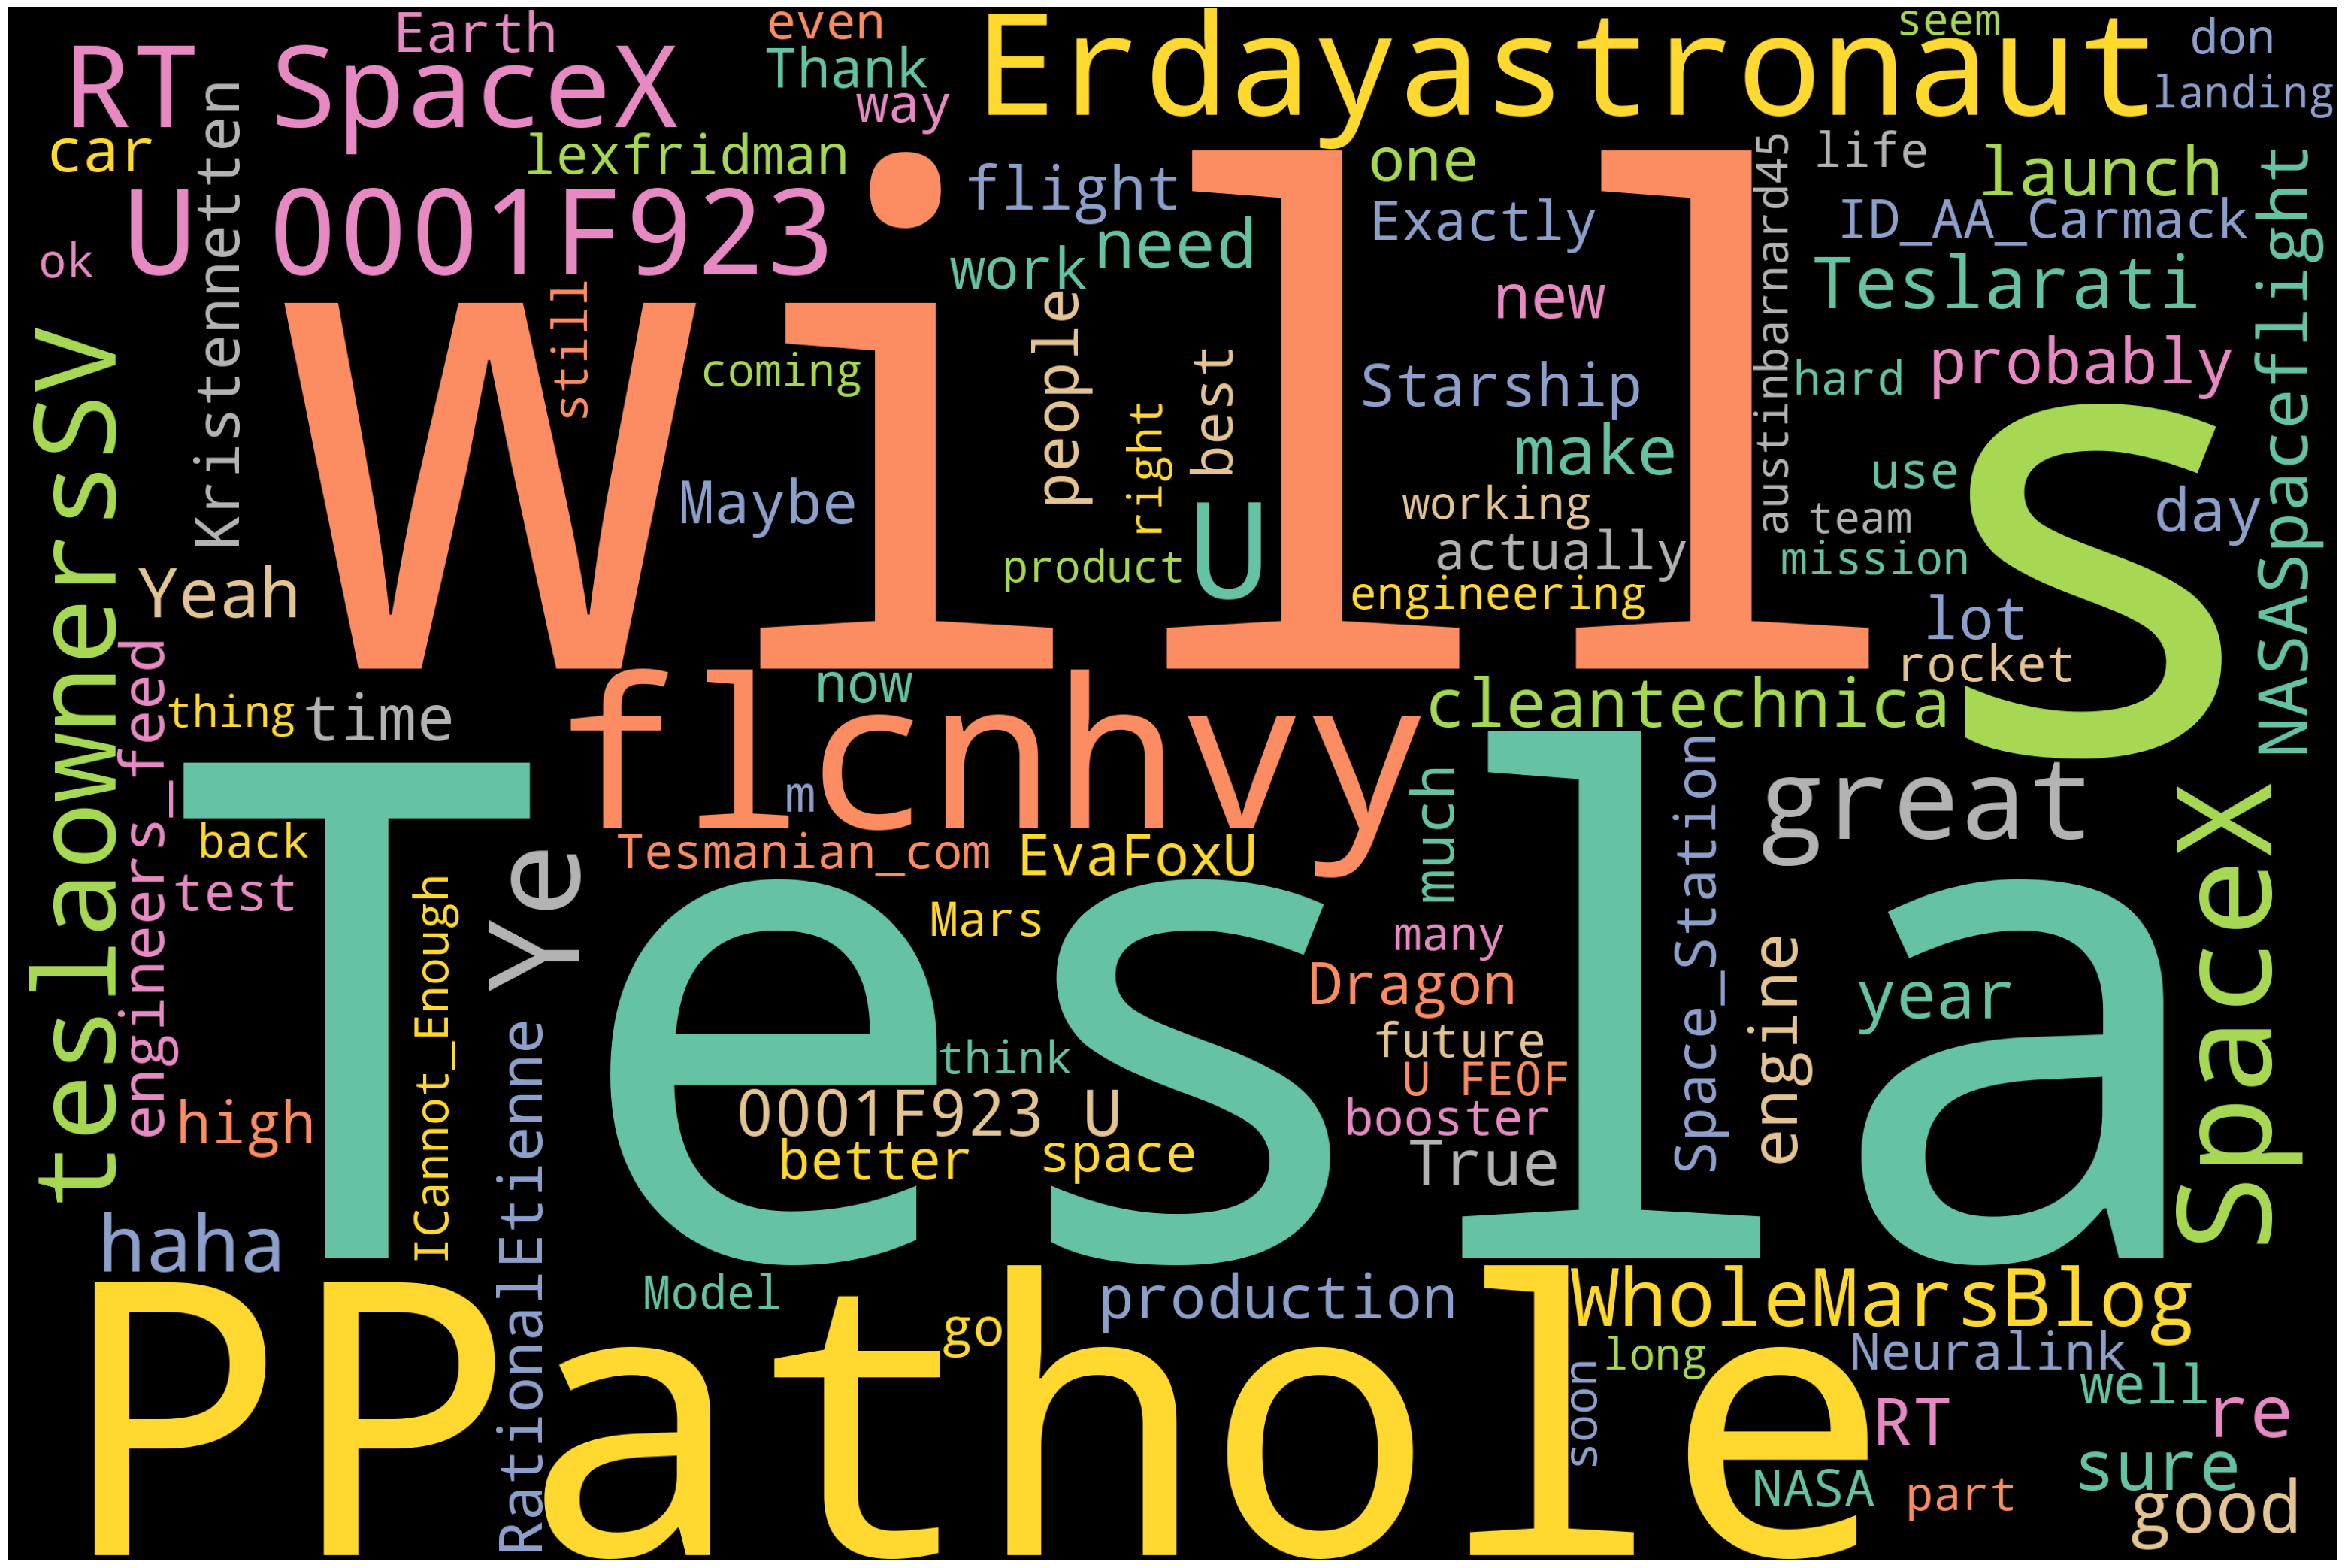

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('https')
stopwords.add('t')
stopwords.add('co')
stopwords.add('amp')



wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
# Save image
wordcloud.to_file("wordcloud.png")

# sentimental analysis

In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
tweet


['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweet))
sentences[1:15]

['Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @

In [ ]:
sent_tweet = pd.DataFrame(sentences, columns=['sentence'])
sent_tweet

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
912,"@kenyanwalstreet Not actually a payout, just a..."
913,"It may never pay out, as the stock can’t b… ht..."
914,Details Aug 28.
915,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
word_scores = afinn.set_index('word')['value'].to_dict()
word_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#defining function

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = word_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
sent_tweet['sentiment_value'] = sent_tweet['sentence'].apply(calculate_sentiment)

@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!!
Happy New Year of the Ox!
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [ ]:
sent_tweet.sort_values(by='sentiment_value')

,sentence,sentiment_value
831,Cool Model 3 review by @iamjamiefoxx https://t...,-8
643,Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...,-8
64,"Also, the road to hell is mostly paved with ba...",-7
475,"He plays the “poor inventor” card, but was ric...",-5
675,"Occasional flights from land are ok, but frequ...",-4
...,...,...
641,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
581,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14
104,@Erdayastronaut @SpaceX Was also thinking that...,16
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16


In [ ]:
# Review of Sentiment score
sent_tweet['sentiment_value'].describe()

count    917.000000
mean       1.355507
std        2.697262
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [ ]:
sent_tweet[sent_tweet['sentiment_value']<-6].head()['sentence'].tolist()[0]    # tweet that contain -ve words

'Also, the road to hell is mostly paved with bad intentions.'

In [ ]:
sent_tweet[sent_tweet['sentiment_value']>15].head()['sentence'].tolist()[0]

'@ajtourville @Erdayastronaut @SpaceX Yes, but engines have a min throttle point where there is flameout risk, so la… https://t.co/ThniYsSnWn @Adamklotz_ @Erdayastronaut @SpaceX Yes @Erdayastronaut @SpaceX It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land I am become meme,\nDestroyer of shorts @commander_cruz Might actually happen Sandstorm is a masterpiece @MadOverlord We were too dumb Next time, we try pull *up* method https://t.co/J1M7WHLRDR Low-key Loki No highs, no lows, only Doge No need to be a gigachad to own Dogecoin is the people’s crypto ur welcome https://t.co/e2KF57KLxb @HuobiGlobal The most entertaining outcome is the most likely Doge https://t.co/vviUzWhodT @Erdayastronaut High seas &amp; wind This was a tough one https://t.co/beY7peFpCj RT @SpaceX: Watch Falcon 9 launch 60 Starlink satellites <U+2192> https://t.co/bJFjLCzWdK  https://t.co/Ln95rEesbW Off Twitter for a while It will be filled with graffiti art @eiraum <U+04

#Visualization

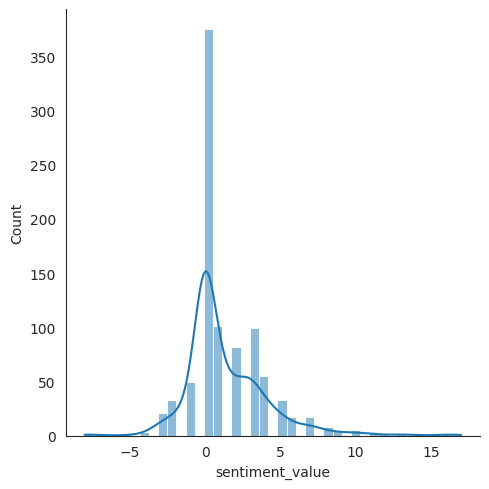

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

sns.displot(data=sent_tweet,x='sentiment_value',kde=True)
plt.show()

Most of the tweets are neautral, where as graph slightly skew towards +ve sentiment value.